O conjunto de dados são o resultado de uma análise química de vinhos cultivados na mesma região da Itália, mas derivados de três cultivares diferentes. A análise determinou as quantidades de 13 constituintes encontrados em cada um dos três tipos de vinhos. Neste projeto será feito, uma análise exploratória, e modelo de machine learning de clusterização, utilizando o algoritmo de kmeans.

Link dataset: https://www.kaggle.com/datasets/harrywang/wine-dataset-for-clustering

Os dados carregados contêm as seguintes colunas:

Alcohol: teor alcoólico.

Malic_Acid: ácido málico.

Ash: cinza.

Ash_Alcanity: alcalinidade das cinzas.

Magnesium: magnésio.

Total_Phenols: fenóis totais.

Flavanoids: flavonoides.

Nonflavanoid_Phenols: fenóis não flavonoides.

Proanthocyanins: proantocianidinas.

Color_Intensity: intensidade da cor.

Hue: tonalidade.

OD280: OD280/OD315 de vinhos diluídos.

Proline: prolina.

In [2]:
import pandas as pd

# Carregar os dados
df = pd.read_csv("/content/drive/MyDrive/Dataset Vinho/wine-clustering.csv")

# Visualizar as primeiras linhas da tabela
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [ ]:
# Verificando valores ausentes
df.isnull().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

Nâo temos valores ausentes em nenhuma das colunas.

In [ ]:
# Obtendo estatísticas descritivas
df.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


As estatísticas descritivas básicas para cada coluna:

Alcohol (Teor alcoólico): Média: 13.00, Desvio padrão: 0.81, Min: 11.03, Max: 14.83

Malic_Acid (Ácido málico): Média: 2.34, Desvio padrão: 1.12, Min: 0.74, Max: 5.80

Ash (Cinza): Média: 2.37, Desvio padrão: 0.27, Min: 1.36, Max: 3.23

Ash_Alcanity (Alcalinidade das cinzas): Média: 19.49, Desvio padrão: 3.34
Min: 10.6, Max: 30.0

Magnesium (Magnésio): Média: 99.74, Desvio padrão: 14.28, Min: 70, Max: 162

Total_Phenols (Fenóis totais): Média: 2.30, Desvio padrão: 0.63, Min: 0.98, Max: 3.88

Flavanoids (Flavonoides): Média: 2.03, Desvio padrão: 1.00, Min: 0.34, Max: 5.08

Nonflavanoid_Phenols (Fenóis não flavonoides): Média: 0.36, Desvio padrão: 0.12,
Min: 0.13, Max: 0.66

Proanthocyanins (Proantocianidinas): Média: 1.59, Desvio padrão: 0.57, Min: 0.41, Max: 3.58

Color_Intensity (Intensidade da cor): Média: 5.06, Desvio padrão: 2.32, Min: 1.28, Max: 13.0

Hue (Tonalidade): Média: 0.96, Desvio padrão: 0.23, Min: 0.48, Max: 1.71

OD280 (OD280/OD315 de vinhos diluídos): Média: 2.61, Desvio padrão: 0.71, Min: 1.27, Max: 4.00

Proline (Prolina):, Média: 746.89, Desvio padrão: 314.91, Min: 278, Max: 1680

In [ ]:
# Calculando a matriz de correlação
df.corr()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
Alcohol,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720
Malic_Acid,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011
Ash,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
Ash_Alcanity,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
Magnesium,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351
Total_Phenols,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115
Flavanoids,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193
Nonflavanoid_Phenols,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385
Proanthocyanins,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417
Color_Intensity,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100


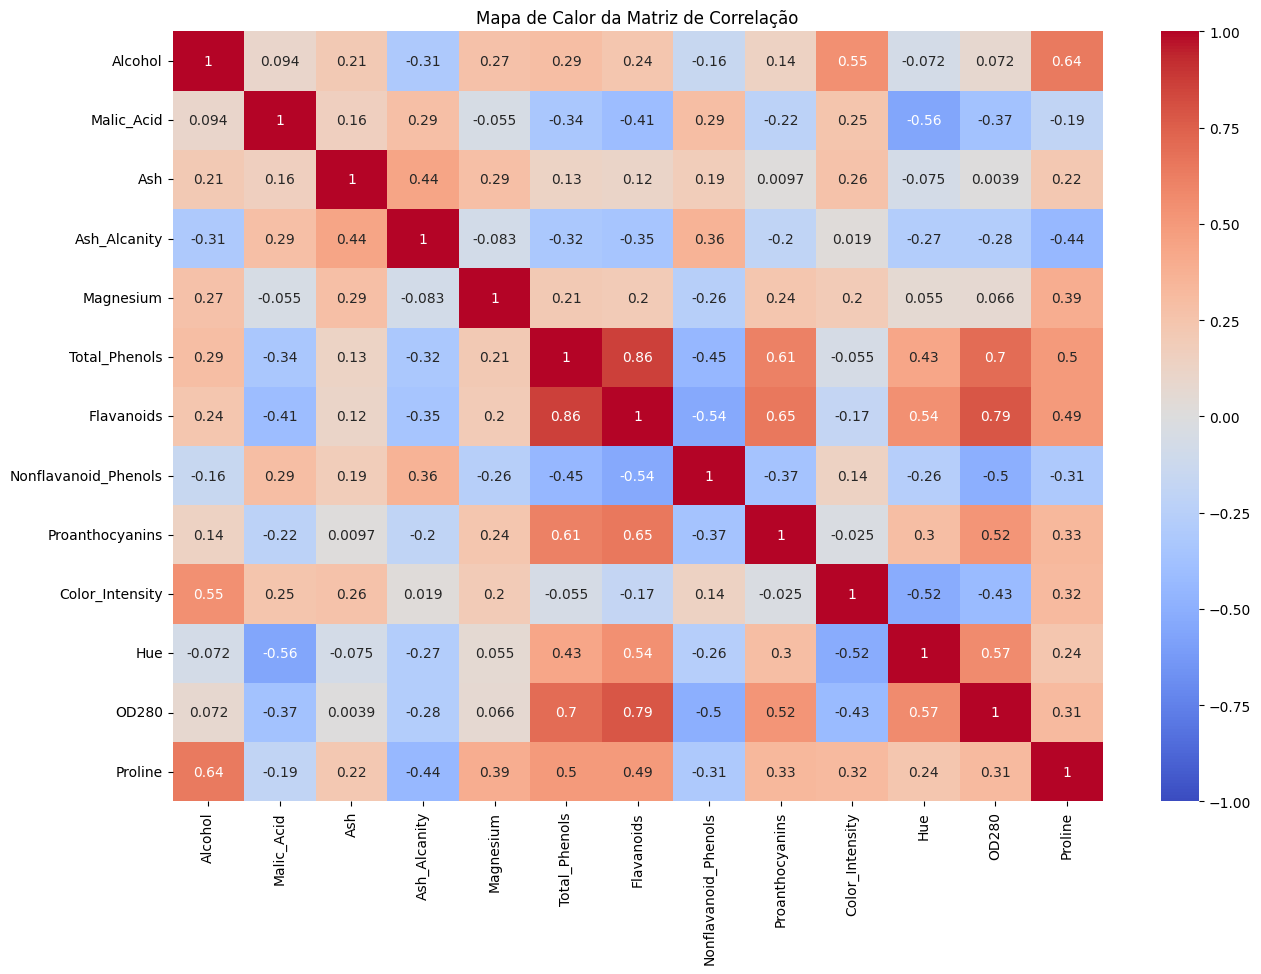

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualizando a matriz de correlação com um mapa de calor
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Mapa de Calor da Matriz de Correlação")
plt.show()

"Flavanoids" e "Total_Phenols" têm uma correlação positiva muito forte, próxima a 0.86. Isso significa que, em geral, quando a quantidade de flavonoides em um vinho aumenta, a quantidade total de fenóis também tende a aumentar, e vice-versa.

"OD280" e "Flavanoids" também têm uma forte correlação positiva de aproximadamente 0.79.

"Color_Intensity" e "Flavanoids" têm uma correlação negativa de aproximadamente -0.55, indicando que à medida que a intensidade da cor aumenta, a quantidade de flavonoides tende a diminuir.

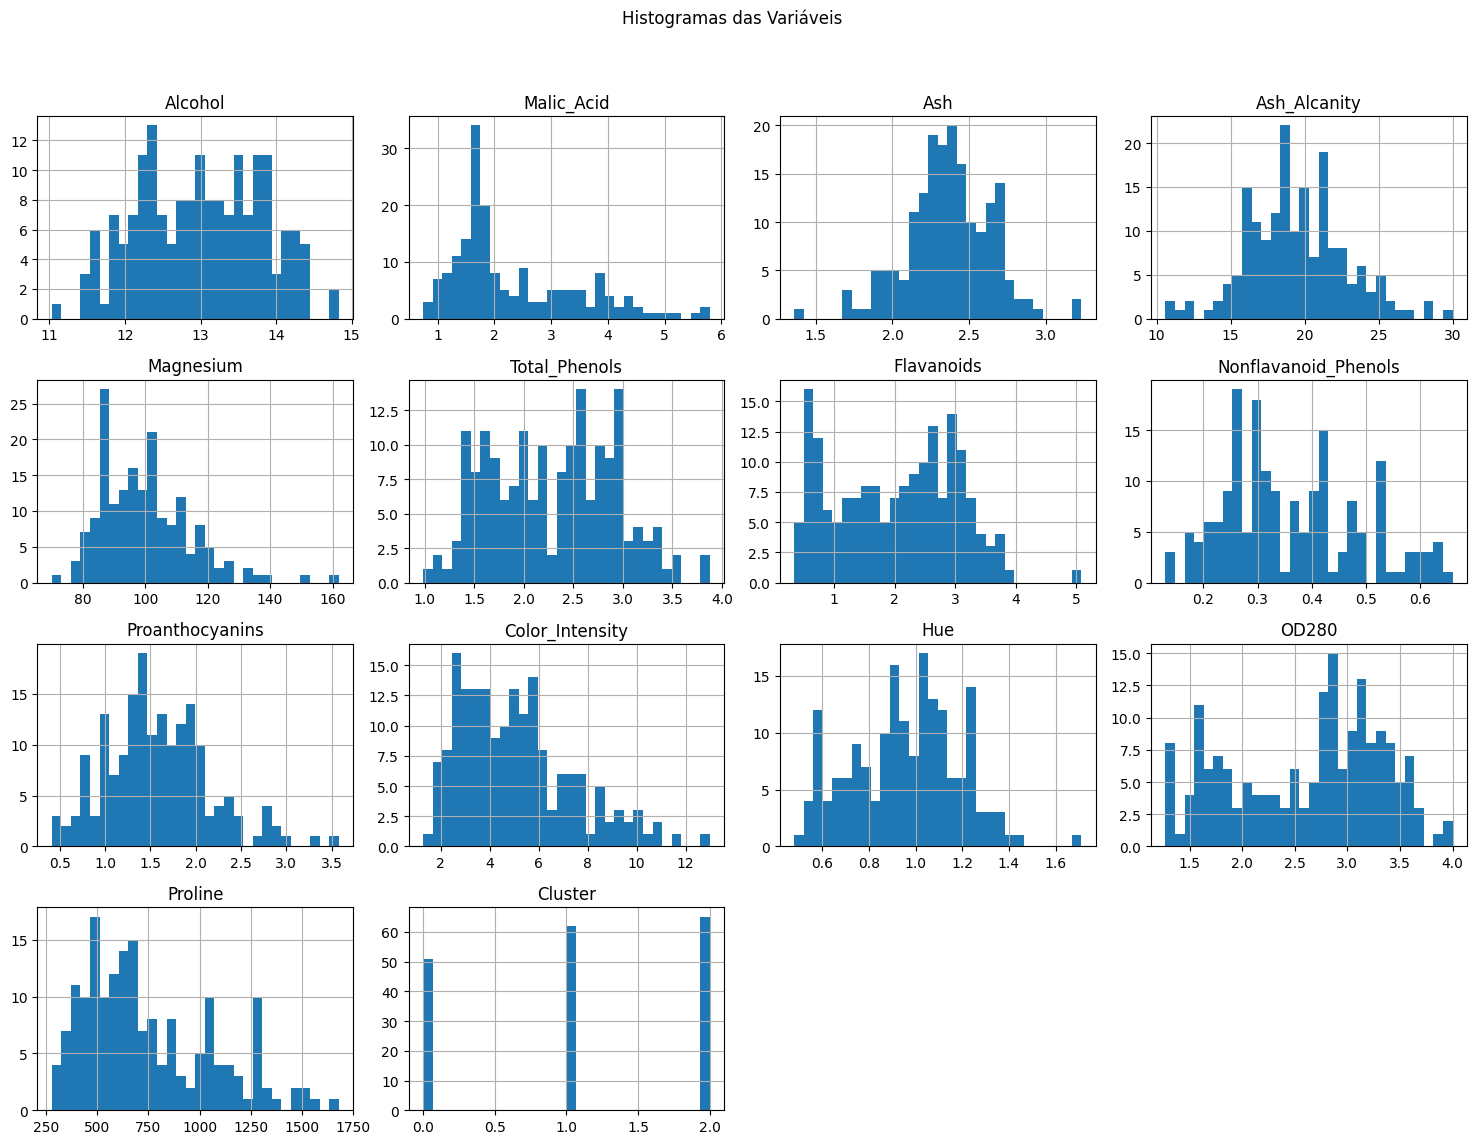

In [ ]:
# Plotando histogramas para todas as colunas
df.hist(figsize=(15,12), bins=30)
plt.suptitle("Histogramas das Variáveis")
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Mostrando os gráficos
plt.show()

Os histogramas nos ajudam a visualizar a distribuição de cada variável:

A maioria das variáveis parece ter uma distribuição razoavelmente normal ou próxima da normalidade, embora algumas, como "Malic_Acid", "Ash_Alcanity" e "Color_Intensity", apresentem uma assimetria positiva.

"Magnesium" e "Proline" também apresentam distribuições interessantes com uma longa cauda à direita.

Criar gráficos de dispersão para algumas combinações de variáveis que mostraram correlações significativas na matriz de correlação.

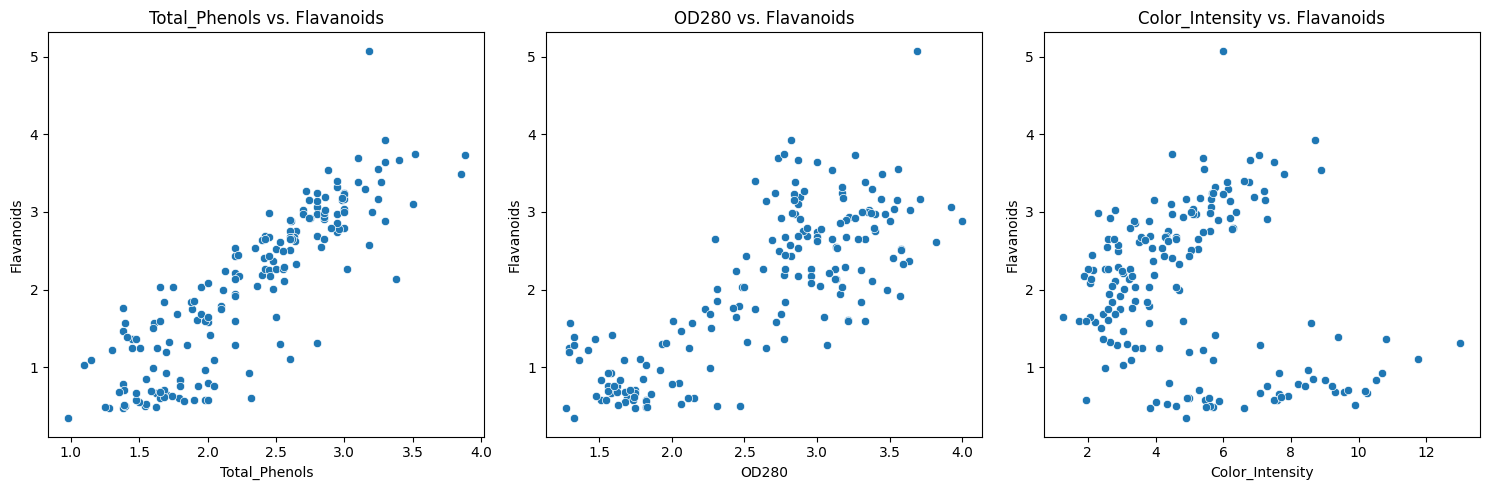

In [ ]:
# Selecionando algumas combinações de variáveis para gráficos de dispersão
pairs = [('Total_Phenols', 'Flavanoids'),
         ('OD280', 'Flavanoids'),
         ('Color_Intensity', 'Flavanoids')]

# Plotando gráficos de dispersão para as combinações selecionadas
plt.figure(figsize=(15, 5))
for i, (x, y) in enumerate(pairs, 1):
    plt.subplot(1, 3, i)
    sns.scatterplot(data=df, x=x, y=y)
    plt.title(f'{x} vs. {y}')

plt.tight_layout()
plt.show()

Os gráficos de dispersão confirmam visualmente algumas das observações feitas com a matriz de correlação:

Total_Phenols vs. Flavanoids: A relação positiva é claramente visível. À medida que "Total_Phenols" aumenta, "Flavanoids" também tende a aumentar.

OD280 vs. Flavanoids: Novamente, há uma relação positiva visível entre essas duas variáveis.

Color_Intensity vs. Flavanoids: Este gráfico mostra uma tendência descendente, confirmando a correlação negativa que observamos.

Criar um modelo de machine learning usando o algoritmo de clusterização kemans para para separar os grupos com características semelhantes.

A padronização é uma etapa crucial quando estamos lidando com algoritmos baseados em distância, como o KMeans. Ao padronizar, garantimos que cada variável contribua de maneira igual para a determinação dos clusters.

In [4]:
from sklearn.preprocessing import StandardScaler

# Padronizando os dados
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df)

In [6]:
# Convertendo para DataFrame para visualização
data_scaled_df = pd.DataFrame(data_scaled, columns=df.columns)

In [7]:
# Mostrando os primeiros registros dos dados padronizados
data_scaled_df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


Os dados foram padronizados com sucesso, como podemos ver pela média próxima a zero e desvio padrão próximo a 1 para cada variável.

Seleção do Número de Clusters (k). Uma técnica comum para determinar o valor adequado de (k) é o método do cotovelo. A ideia é executar a clusterização KMeans para vários valores de (k) e, para cada um, calcular a soma dos quadrados intra-cluster (WCSS). À medida que (k) aumenta, o WCSS geralmente diminui. O objetivo é encontrar o "cotovelo" no gráfico, que é o ponto em que o WCSS começa a diminuir a uma taxa mais lenta.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

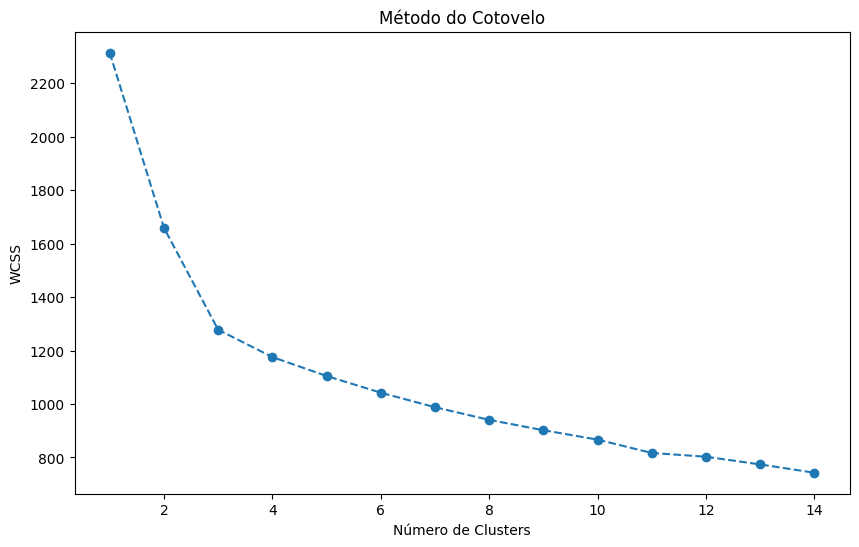

In [8]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Calculando a soma das distâncias quadradas dentro do cluster para diferentes valores de k
wcss = []
range_clusters = range(1, 15)
for k in range_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)

# Plotando o gráfico do método do cotovelo
plt.figure(figsize=(10, 6))
plt.plot(range_clusters, wcss, marker='o', linestyle='--')
plt.title('Método do Cotovelo')
plt.xlabel('Número de Clusters')
plt.ylabel('WCSS')
plt.show()

O gráfico do método do cotovelo nos mostra que a taxa de diminuição da WCSS começa a abrandar a partir do terceiro cluster (k=3). Portanto, parece ser um bom ponto de partida para a escolha do número de clusters.

Agora, vamos seguir para o passo de Clusterização com KMeans usando k=3.

In [9]:
# Treinando o modelo KMeans com 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(data_scaled)

# Adicionando os clusters ao DataFrame original para análise posterior
df['Cluster'] = clusters

df.head()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Cluster
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


O modelo KMeans foi treinado com sucesso e os clusters foram atribuídos a cada registro no conjunto de dados.

Para entender as características que diferenciam os clusters, vamos observar as médias das características para cada cluster. Isso nos dará uma ideia das características predominantes em cada cluster.

In [10]:
# Calculando a média de cada característica para cada cluster
cluster_means = df.groupby('Cluster').mean()
cluster_means

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
Cluster,,,,,,,,,,,,,
0,13.134118,3.307255,2.417647,21.241176,98.666667,1.683922,0.818824,0.451961,1.145882,7.234706,0.691961,1.696667,619.058824
1,13.676774,1.997903,2.466290,17.462903,107.967742,2.847581,3.003226,0.292097,1.922097,5.453548,1.065484,3.163387,1100.225806
2,12.250923,1.897385,2.231231,20.063077,92.738462,2.247692,2.050000,0.357692,1.624154,2.973077,1.062708,2.803385,510.169231


Podemos fazer as seguintes observações:

Cluster 0: Este cluster tem vinhos com níveis relativamente altos de "Malic_Acid" e "Color_Intensity", mas níveis mais baixos de "Flavanoids", "Hue", "OD280" e "Proline".

Cluster 1: Os vinhos deste cluster têm níveis mais altos de "Alcohol", "Total_Phenols", "Flavanoids", "Proanthocyanins", "Hue", "OD280" e "Proline".

Cluster 2: Este cluster parece representar vinhos com características intermediárias, mas com níveis mais baixos de "Alcohol", "Color_Intensity" e "Proline".

Dada a natureza multidimensional dos dados, é um desafio visualizar os clusters em um gráfico bidimensional. Uma abordagem comum é usar técnicas de redução de dimensionalidade, como o PCA (Principal Component Analysis), para reduzir os dados a 2 ou 3 dimensões e, em seguida, visualizar os clusters. Vamos usar o PCA para visualizar os clusters em 2D.

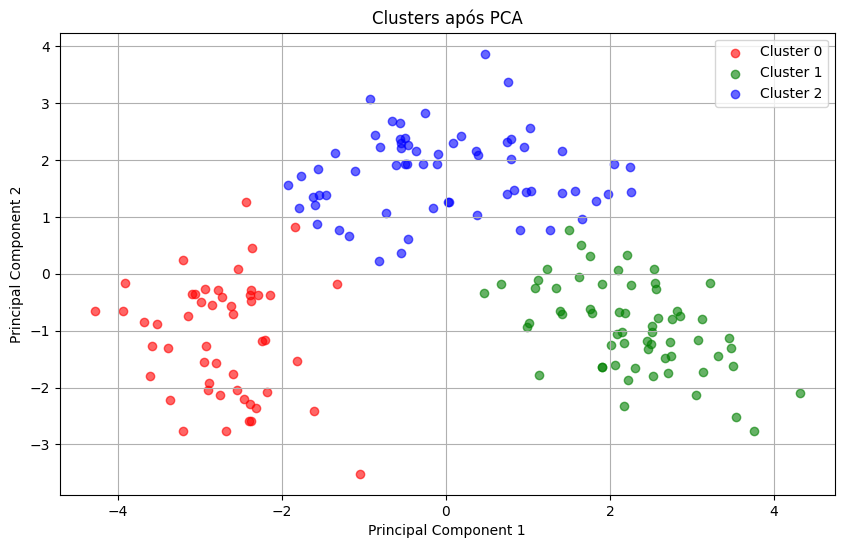

In [11]:
from sklearn.decomposition import PCA

# Aplicando PCA para reduzir a dimensionalidade
pca = PCA(n_components=2)
principal_components = pca.fit_transform(data_scaled)

# Convertendo para DataFrame para fácil manipulação
df_pca = pd.DataFrame(data=principal_components, columns=['Principal Component 1', 'Principal Component 2'])
df_pca['Cluster'] = clusters

# Plotando os clusters em 2D
plt.figure(figsize=(10, 6))
colors = ['r', 'g', 'b']
for cluster, color in zip([0, 1, 2], colors):
    subset = df_pca[df_pca['Cluster'] == cluster]
    plt.scatter(subset['Principal Component 1'], subset['Principal Component 2'], c=color, label=f'Cluster {cluster}', alpha=0.6)

plt.title('Clusters após PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()

A visualização acima mostra os clusters em um espaço bidimensional usando os dois primeiros componentes principais do PCA. Podemos observar que os clusters estão razoavelmente bem separados, o que indica que o algoritmo KMeans fez um bom trabalho em agrupar os vinhos com características semelhantes.

Calcular as seguintes métricas.

Silhouette Score: O coeficiente de silhueta é uma medida de quão semelhante um objeto é ao seu próprio cluster (coesão) em comparação com outros clusters (separação). O coeficiente de silhueta varia de -1 a 1. Um valor alto indica que o objeto está bem parecido com seu próprio cluster e mal parecido com clusters vizinhos.

WCSS (Within-Cluster-Sum-of-Squares): Como mencionado anteriormente, o WCSS é a soma das distâncias quadradas das amostras ao centro mais próximo do cluster. Quanto menor o WCSS, mais densos (e presumivelmente melhores) são os clusters.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

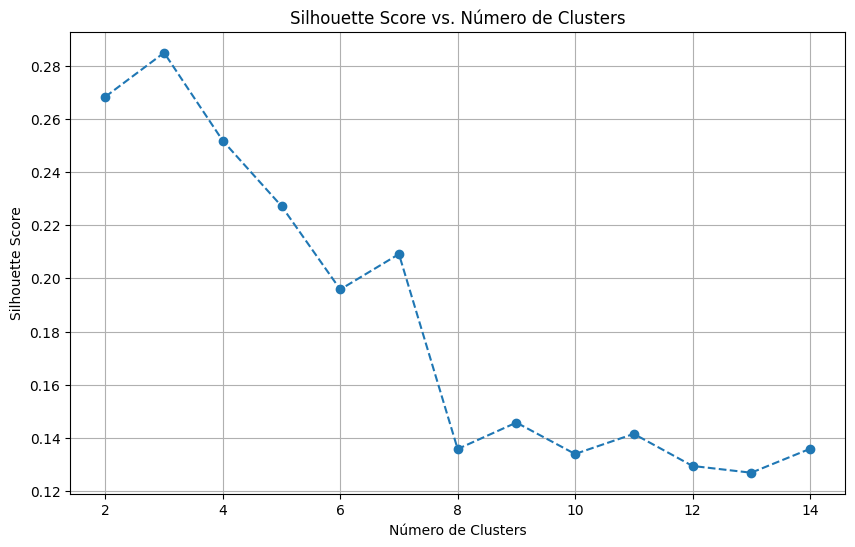

(0.2848589191898987, 1277.9284888446423)

In [12]:
from sklearn.metrics import silhouette_score

# Calculando o Silhouette Score para nosso modelo com 3 clusters
sil_score = silhouette_score(data_scaled, clusters)

# WCSS para nosso modelo com 3 clusters
wcss_score = kmeans.inertia_

# Calculando Silhouette Scores para uma faixa de clusters para visualização
sil_scores = []
range_clusters = range(2, 15)  # Começando de 2 porque o silhouette_score precisa de pelo menos 2 clusters
for k in range_clusters:
    kmeans_temp = KMeans(n_clusters=k, random_state=42).fit(data_scaled)
    cluster_temp = kmeans_temp.predict(data_scaled)
    sil_scores.append(silhouette_score(data_scaled, cluster_temp))

# Plotando o gráfico do Silhouette Score para diferentes números de clusters
plt.figure(figsize=(10, 6))
plt.plot(range_clusters, sil_scores, marker='o', linestyle='--')
plt.title('Silhouette Score vs. Número de Clusters')
plt.xlabel('Número de Clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

sil_score, wcss_score

O gráfico mostra o coeficiente de silhueta para diferentes números de clusters. Idealmente, queremos um número de clusters que maximize o coeficiente de silhueta. Neste caso, parece que 3 clusters fornecem um bom equilíbrio, o que é consistente com nossa análise anterior usando o método do cotovelo.

Resultados das Métricas para o modelo com 3 clusters:

Silhouette Score: Aproximadamente 0.285. Este valor indica uma estrutura de cluster razoável. Um valor mais próximo de 1 teria sido ideal, mas 0.285 ainda é aceitável, indicando que os clusters não estão muito sobrepostos.

WCSS: Aproximadamente 1277.93. Lembre-se de que queremos minimizar este valor. No contexto do método do cotovelo, observamos que aumentar o número de clusters além de 3 não resultava em uma grande diminuição do WCSS, então 3 foi uma boa escolha.

Conclusões

Os vinhos foram agrupados em três clusters distintos com base em suas características físico-químicas.

O Cluster 0 parece conter vinhos com níveis mais altos de "Malic_Acid" e "Color_Intensity", mas níveis mais baixos de características como "Flavanoids", "Hue", "OD280" e "Proline".

O Cluster 1 representa vinhos com características premium, com níveis mais altos de "Alcohol", "Total_Phenols", "Flavanoids", "Proanthocyanins", "Hue", "OD280" e "Proline".

O Cluster 2 tem vinhos com características intermediárias, mas com níveis mais baixos de "Alcohol", "Color_Intensity" e "Proline".

O PCA foi útil para visualizar os clusters em um espaço bidimensional, e os clusters estavam bem separados no espaço reduzido, indicando uma boa agrupação.
Para um aprofundamento maior, seria interessante também analisar outras
técnicas de clusterização e comparar os resultados, bem como considerar outras técnicas de redução de dimensionalidade para visualização e análise.